# Satellite Image Data <br>Analysis using numpy</p>

### Data Source: Satellite Image from WIFIRE Project</p>


WIFIRE is an integrated system for wildfire analysis, with specific regard to changing urban dynamics and climate. The system integrates networked observations such as heterogeneous satellite data and real-time remote sensor data, with computational techniques in signal processing, visualization, modeling, and data assimilation to provide a scalable method to monitor such phenomena as weather patterns that can help predict a wildfire's rate of spread. You can read more about WIFIRE at: https://wifire.ucsd.edu/

In this example, we will analyze a sample satellite image dataset from WIFIRE using the numpy Library.


### Loading the libraries we need: numpy, imageio, matplotlib</p>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio


### Creating a numpy array from an image file:</p>

<br>
Lets choose a WIFIRE satellite image file as an ndarray and display its type.


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')
photo_data = imageio.imread('drive/My Drive/Notebook04/Notebook04/wifire.jpg')
type(photo_data)

Mounted at /content/drive


numpy.ndarray

Let's see what is in this image.

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
photo_data.shape

(3725, 4797, 3)

The shape of the ndarray show that it is a three layered matrix. The first two

*   List item
*   List item

numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue. rows, col, how deep the stack is, red green, blue layers

### RGB Color Mapping in the Photo:</p> <br>
<ul>
<li><p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<li><p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
GREEN pixel indicates Slope
</p>
<li><p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">
BLUE pixel indicates Aspect (direction of slope, measured from north towards east)
</p>
</ul>
<br>
The higher values denote higher altitude, aspect and slope.


In [ ]:
photo_data.size

53606475

In [ ]:
photo_data.min(), photo_data.max()

(0, 255)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Pixel on the 150th Row and 250th Column</p>

In [ ]:
photo_data[150, 250]

array([ 15,  42, 233], dtype=uint8)

In [ ]:
photo_data[150, 250, 1]

42


### Set a Pixel to All Zeros</p>
<br/>
We can set all three layers in a pixel at once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

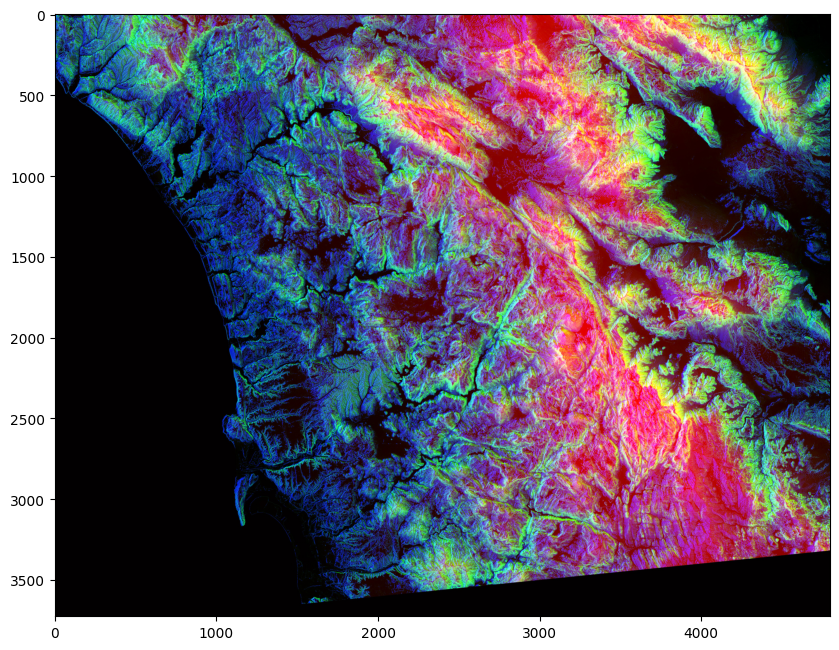

In [ ]:
photo_data[150, 250, :] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)


### Changing Colors in a Range<p/>
<br/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 to 800 to full intensity.

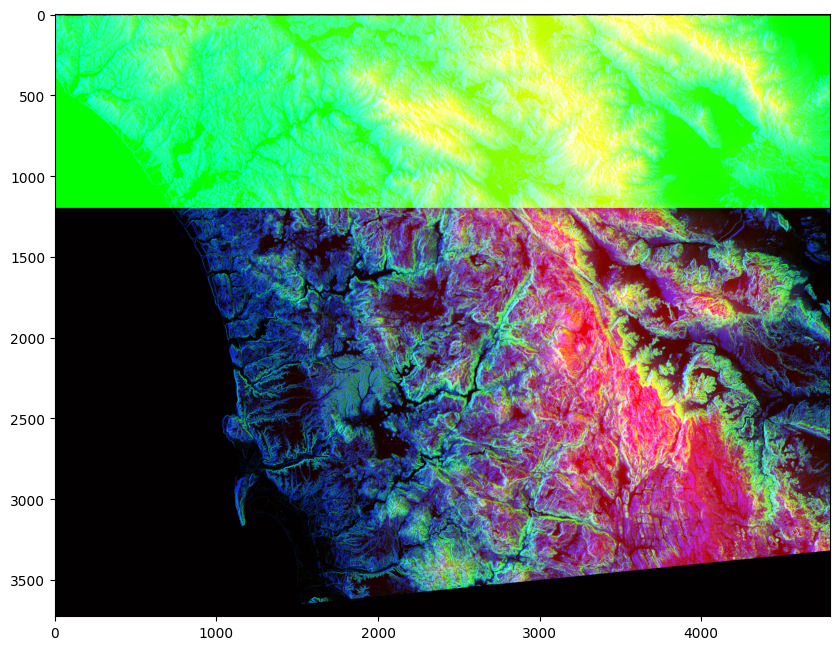

In [ ]:
photo_data = imageio.imread('drive/My Drive/Notebook04/Notebook04/wifire.jpg')

photo_data[10:1200, : ,1] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

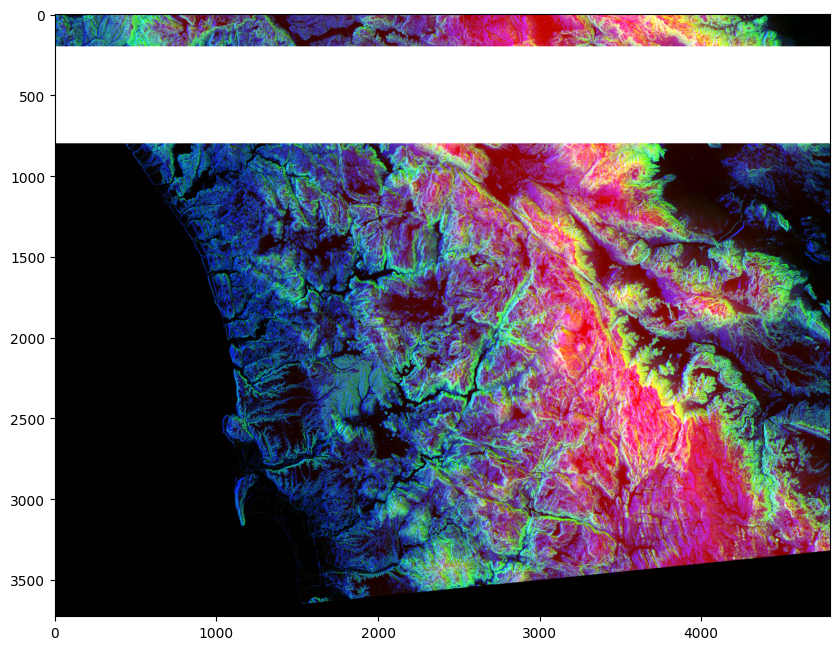

In [ ]:
photo_data = imageio.imread('drive/My Drive/Notebook04/Notebook04/wifire.jpg')

photo_data[200:800, :, :] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

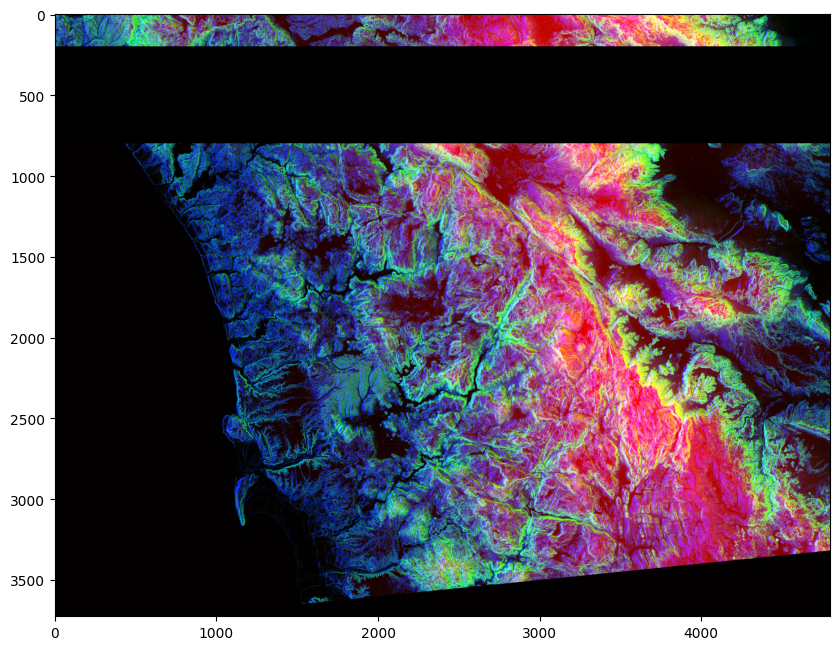

In [ ]:
photo_data = imageio.imread('drive/My Drive/Colab Notebooks/Notebook04/wifire.jpg')

photo_data[200:800, :, :] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)


### Pick all Pixels with Low Values</p>

In [ ]:
photo_data = imageio.imread('drive/My Drive/Notebook04/Notebook04/wifire.jpg')
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 200
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (3725, 4797, 3)
Shape of low_value_filter: (3725, 4797, 3)



### Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0.

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

Output hidden; open in https://colab.research.google.com to view.


### Masking Images</p>
<br>Now let us try something even cooler...a mask that is in shape of a circular disc.

<img src='https://drive.google.com/uc?export=view&id=1dkt18gWrKncCimondhtZotbsXty1WgD_' align="left" style="width:750px;height:450px;"/>

In [ ]:
total_rows, total_cols, total_layers = photo_data.shape
print("photo_data = ", photo_data.shape)

X = np.arange(total_cols).reshape(1,total_cols)
Y = np.arange(total_rows).reshape(total_rows,1)
print("X = ", X.shape, " and Y = ", Y.shape)
print(X)
print(Y)
print(X+Y)

photo_data =  (3725, 4797, 3)
X =  (1, 4797)  and Y =  (3725, 1)
[[   0    1    2 ... 4794 4795 4796]]
[[   0]
 [   1]
 [   2]
 ...
 [3722]
 [3723]
 [3724]]
[[   0    1    2 ... 4794 4795 4796]
 [   1    2    3 ... 4795 4796 4797]
 [   2    3    4 ... 4796 4797 4798]
 ...
 [3722 3723 3724 ... 8516 8517 8518]
 [3723 3724 3725 ... 8517 8518 8519]
 [3724 3725 3726 ... 8518 8519 8520]]


In [ ]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "AND center_col = ", center_col)
print((X - center_col)+0.5)
print((Y - center_row)+0.5)
dist_from_center_sq = ((X - center_col)+0.5)**2 + ((Y - center_row)+0.5)**2
print(dist_from_center_sq)
radius_sq = ((total_rows / 2) - 0.5)**2
print("Radius Squared = ", radius_sq)
circular_mask = (dist_from_center_sq > radius_sq)
print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

center_row =  1862.5 AND center_col =  2398.5
[[-2398. -2397. -2396. ...  2396.  2397.  2398.]]
[[-1862.]
 [-1861.]
 [-1860.]
 ...
 [ 1860.]
 [ 1861.]
 [ 1862.]]
[[9217448. 9212653. 9207860. ... 9207860. 9212653. 9217448.]
 [9213725. 9208930. 9204137. ... 9204137. 9208930. 9213725.]
 [9210004. 9205209. 9200416. ... 9200416. 9205209. 9210004.]
 ...
 [9210004. 9205209. 9200416. ... 9200416. 9205209. 9210004.]
 [9213725. 9208930. 9204137. ... 9204137. 9208930. 9213725.]
 [9217448. 9212653. 9207860. ... 9207860. 9212653. 9217448.]]
Radius Squared =  3467044.0
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False Fals

In [ ]:
photo_data = imageio.imread('drive/My Drive/Notebook04/Notebook04/wifire.jpg')
photo_data[circular_mask] = 0 #This uses broadcasting of a boolean filter to all three colors! See previous notebook.
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

Output hidden; open in https://colab.research.google.com to view.


## Further Processing of our Satellite Imagery </p>

### Detecting Highly-RED Pixels</p>

Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas. We will do this by detecting high intensity RED Pixels and muting down other areas.

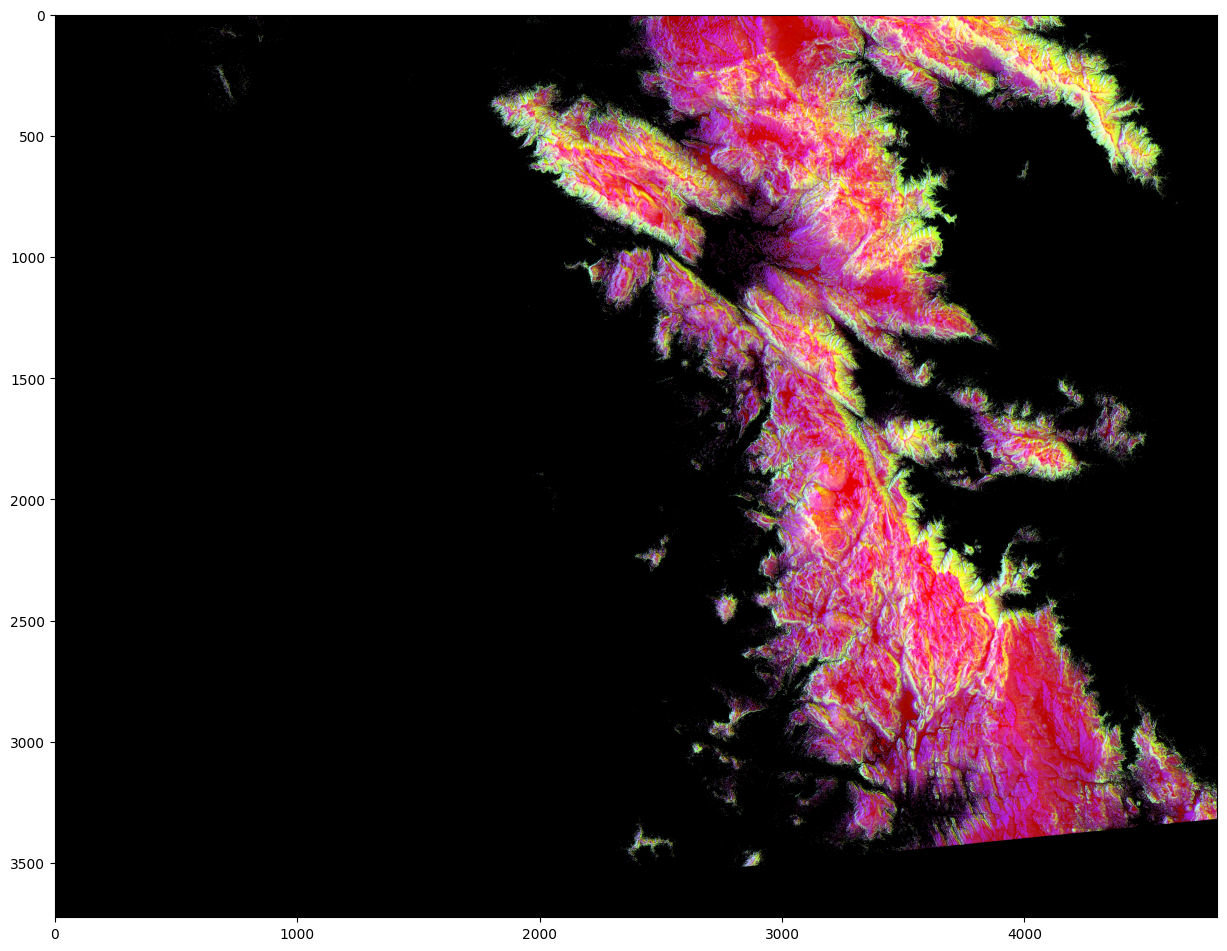

In [ ]:
photo_data = imageio.imread('drive/My Drive/Notebook04/Notebook04/wifire.jpg')
red_mask   = photo_data[:, : ,0] < 150
photo_data[red_mask] = 0 #This uses broadcasting of a boolean filter to all three colors! See previous notebook.
plt.figure(figsize=(15,15))
plt.imshow(photo_data)


### Detecting Highly-GREEN Pixels</p>

### Exercise 1:
Perform the same type of detection as above, but this time to detect highly green pixels (>= 150). These will be high slope areas (steep areas). Then display the image below.

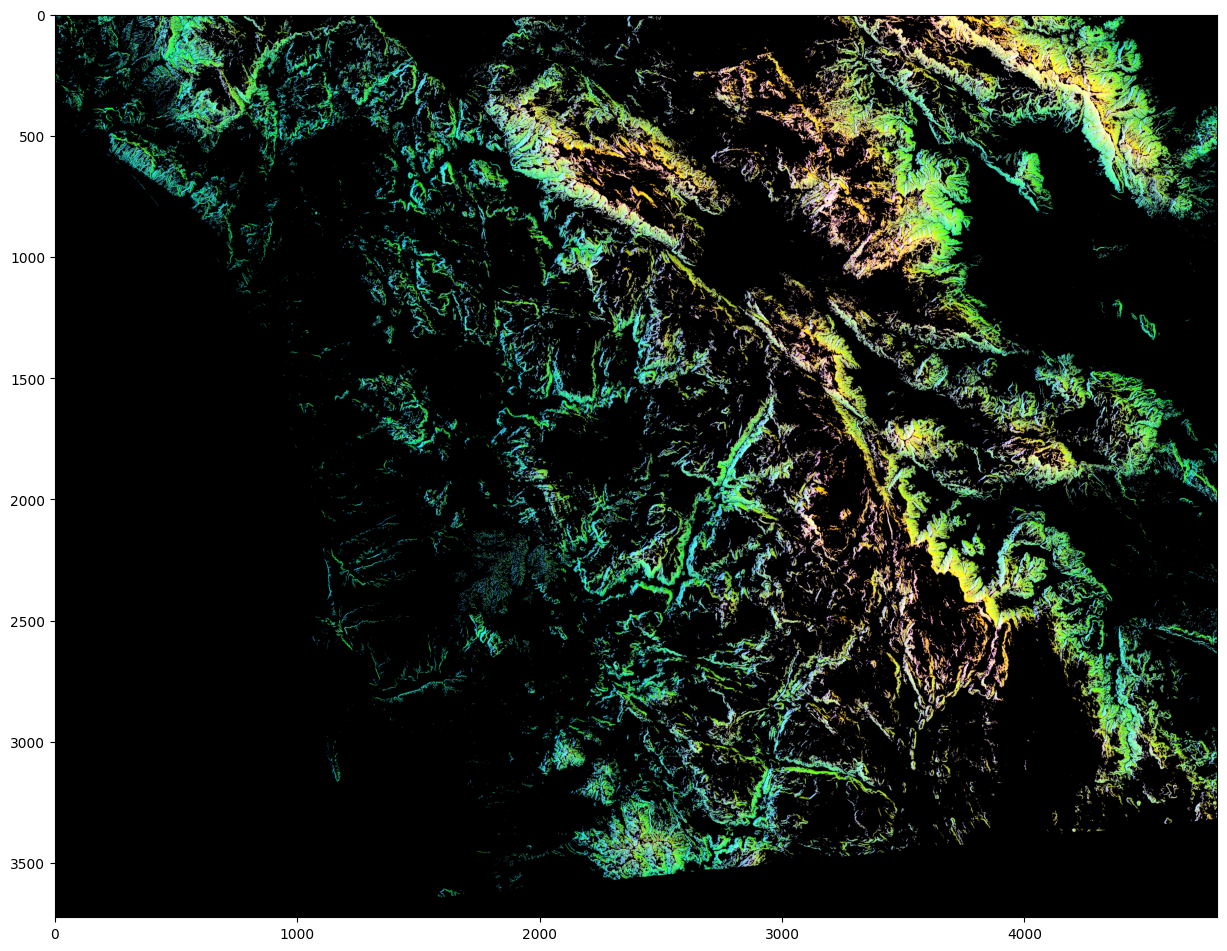

In [ ]:
photo_data = imageio.imread('drive/My Drive/Notebook04/Notebook04/wifire.jpg')
### YOUR CODE GOES HERE!
# Create a mask for high-intensity green pixels (>= 150)
green_mask = photo_data[:, :, 1] < 150  # Mute areas where green intensity is less than 150

photo_data[green_mask] = 0  #This uses broadcasting of a boolean filter to all three colors! See previous notebook.

# Display the image with high green pixels highlighted
plt.figure(figsize=(15, 15))
plt.imshow(photo_data)



### Detecting Highly-BLUE Pixels</p>

### Exercise 2:
Perform the same type of detection as above, but this time to detect highly blue pixels (>= 150). This should select areas where the slope faces generally westward. Then display the image below.

In [ ]:
photo_data = imageio.imread('drive/My Drive/Notebook04/Notebook04/wifire.jpg')
### YOUR CODE GOES HERE!

# Create a mask for high-intensity blue pixels (>= 150)
blue_mask   = photo_data[:, : ,2] < 150
photo_data[blue_mask] = 0 #This uses broadcasting of a boolean filter to all three colors! See previous notebook.

# Display the image with high blue pixels highlighted
plt.figure(figsize=(15,15))
plt.imshow(photo_data)




Output hidden; open in https://colab.research.google.com to view.

### Exercise 3: A New Image
Load and dislay the image of a kitten included with this download (kitten.jpg). Then refer to the "changing colors in a range" part of the notebook to put a black horizontal bar across the kitten's face (maybe he is in the witness protection program?), and then display that altered image directly under the original one.

In [ ]:
photo_data = imageio.imread('drive/My Drive/Notebook04/Notebook04/kitten.jpg')
plt.figure(figsize=(10,10))
### YOUR CODE GOES HERE!

plt.imshow(photo_data)

# Add a black horizontal line
photo_data[1100:1500, :, :] = 0  # Set all RGB channels to 0 for rows 10 to 1200

# Display the altered image
plt.figure(figsize=(10, 10))
plt.imshow(photo_data)


Output hidden; open in https://colab.research.google.com to view.